# Glassdoor job data analysis

In [633]:
"""
some questions to address

EDA
- which country has more number of blockchain related jobs ?
- which state in USA has more jobs related with blockchain ?
- which company has more jobs in blockchain ?
- which type of company is hiring related with blockchain ?
- which industry( finance, marketing, technology, supplychain, helth)  has more blockchain related jobs
- what are the most frequent job titles in blockchain industry
-  when company founded ( if it most recent or establised company)
- smallest and largest average size of the company
- revenue of the company by industry and number of jobs
- competitors of the company ( show something in groups chart )


NLP questions
- Apply NLP to see what words are most frequently in job description
- do job description change with country ?
- try to extract require skills and qualification/degree of the job


KNN
- can you apply KNN and see any classification ? Think about it 

"""

'\nsome questions to address\n\nEDA\n- which country has more number of blockchain related jobs ?\n- which state in USA has more jobs related with blockchain ?\n- which company has more jobs in blockchain ?\n- which type of company is hiring related with blockchain ?\n- which industry( finance, marketing, technology, supplychain, helth)  has more blockchain related jobs\n- what are the most frequent job titles in blockchain industry\n-  when company founded ( if it most recent or establised company)\n- smallest and largest average size of the company\n- revenue of the company by industry and number of jobs\n- competitors of the company ( show something in groups chart )\n\n\nNLP questions\n- Apply NLP to see what words are most frequently in job description\n- do job description change with country ?\n- try to extract require skills and qualification/degree of the job\n\n\nKNN\n- can you apply KNN and see any classification ? Think about it \n\n'

In [634]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [635]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0


from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


#sns.set_style('white')


2.5.1


In [636]:
import plotly
plotly.tools.set_credentials_file(username='AkshayVaghani', api_key='XNEHvjcgLN1QefJO5Uxy')

In [637]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [638]:
# read data file and join them

df_usa = pd.read_csv('./data/blockchain_jobs_usa.csv')
df_uk = pd.read_csv('./data/blockchain_jobs_uk.csv')
df_canada = pd.read_csv('./data/blockchain_jobs_canada.csv')
df_france = pd.read_csv('./data/blockchain_jobs_france.csv')
df_germany = pd.read_csv('./data/blockchain_jobs_germany.csv')
df_australia = pd.read_csv('./data/blockchain_jobs_australia.csv')
df_india = pd.read_csv('./data/blockchain_jobs_india.csv')
df_italy = pd.read_csv('./data/blockchain_jobs_italy_argentina.csv')
df_rest = pd.read_csv('./data/blockchain_jobs_rest.csv')


In [639]:
# join data all dataframe

frames = [df_usa,df_uk,df_canada,df_france,df_germany,df_australia,df_india,df_italy,df_rest]
df=pd.concat(frames)
#df = pd.read_csv('blockchain_jobs.csv')

df.head()

average_salary       city_state  company_id  \
0        $74,000       Dulles, VA       13747   
1            NaN       Boston, MA     1291298   
2        $72,000     Brooklyn, NY     1613426   
3            NaN  Los Angeles, CA     2078523   
4            NaN     Pasadena, CA     1333434   

                                        company_info      company_name  \
0  [('Headquarters', 'Sterling, VA'), ('Size', '2...          Technica   
1  [('Headquarters', 'Boston, MA'), ('Size', '51 ...            Circle   
2  [('Headquarters', 'New York, NY'), ('Size', '2...         ConsenSys   
3  [('Headquarters', 'Los Angeles, CA'), ('Size',...  Mercury Protocol   
4  [('Headquarters', 'Pasadena, CA'), ('Size', '1...              ObEN   

  company_rating   country_name  \
0            2.9  United States   
1            4.4  United States   
2            4.6  United States   
3           None  United States   
4            5.0  United States   

                                            job_desc             job_title  \
0  Position Description Technica Corporation is s...  BlockChain Developer   
1  Boston, USACircle is a global internet finance...   Blockchain Engineer   
2  About ConsenSys ConsenSys is a venture product...   Blockchain Engineer   
3  About Us:Mercury Protocol is the future of com...   Senior iOS Engineer   
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...   Blockchain Engineer   

      post_date  
0    3 days ago  
1   17 days ago  
2    4 days ago  
3   11 days ago  
4   27 days ago

In [640]:
# description of the data
#df.describe()
#df.info()
#type(df['country_name'])

In [641]:

print(df.isnull().sum())
print(len(pd.unique(df['company_name'])))
print(len(pd.unique(df["city_state"])))
print(len(pd.unique(df["country_name"])))
#print(len(df.loc[df['country_name']=='United States']))
#df.columns

average_salary    1763
city_state           0
company_id           0
company_info        13
company_name         0
company_rating       0
country_name         0
job_desc             0
job_title            0
post_date            0
dtype: int64
727
316
18


In [642]:
# drop rows with no info from company info
df=df.dropna(subset = ['company_info'])
df

average_salary         city_state  company_id  \
0          $74,000         Dulles, VA       13747   
1              NaN         Boston, MA     1291298   
2          $72,000       Brooklyn, NY     1613426   
3              NaN    Los Angeles, CA     2078523   
4              NaN       Pasadena, CA     1333434   
5              NaN             Remote     1900582   
6          $77,000         Boston, MA       37815   
7         $103,000       New York, NY        8450   
8         $150,000        Seattle, WA        6036   
9              NaN  San Francisco, CA      795661   
10             NaN        Seattle, WA      788899   
11             NaN       New York, NY     1013721   
12             NaN         Boston, MA     2038191   
13        $145,000        Seattle, WA        6036   
14             NaN    Los Angeles, CA     2078523   
15             NaN       New York, NY     1013721   
16             NaN         Edison, NJ      432787   
17             NaN       New York, NY     1013721   
18             NaN    Los Angeles, CA     2078523   
19             NaN       New York, NY     1013721   
20             NaN       New York, NY     1013721   
21             NaN    Los Angeles, CA     2078523   
22        $120,000        Seattle, WA        6036   
23             NaN       New York, NY     1013721   
24             NaN       New York, NY     1013721   
25             NaN       New York, NY     1013721   
26             NaN       New York, NY     1013721   
27             NaN        Seattle, WA     2092463   
28             NaN       New York, NY     2090853   
29         $89,000       Brooklyn, NY     1613426   
..             ...                ...         ...   
122            NaN             Russia     1882770   
123            NaN             Moscow     1882770   
124            NaN             Russia     1882770   
125            NaN             Russia     1882770   
126            NaN             Russia     1882770   
127            NaN             Russia     1882770   
128            NaN             Russia     1882770   
129            NaN             Russia     1882770   
130            NaN             Russia     1882770   
131            NaN             Moscow     1882770   
132            NaN             Russia     1882770   
133            NaN             Russia     1882770   
134            NaN             Russia     1882770   
135            NaN             Moscow         354   
136            NaN             Moscow        8450   
137            NaN             Moscow     1882770   
138            NaN             Moscow     1882770   
139            NaN             Russia     1882770   
140            NaN             Moscow      692198   
141            NaN        Novosibirsk      692198   
142            NaN             Russia     1882770   
143            NaN        Novosibirsk      692198   
144            NaN             Moscow     1882770   
145            NaN             Moscow     1882770   
146            NaN             Moscow     1882770   
147            NaN             Moscow     1882770   
148            NaN             Moscow     1882770   
149            NaN             Riyadh       10471   
150            NaN             Jeddah         544   
151            NaN             Riyadh       10471   

                                          company_info  \
0    [('Headquarters', 'Sterling, VA'), ('Size', '2...   
1    [('Headquarters', 'Boston, MA'), ('Size', '51 ...   
2    [('Headquarters', 'New York, NY'), ('Size', '2...   
3    [('Headquarters', 'Los Angeles, CA'), ('Size',...   
4    [('Headquarters', 'Pasadena, CA'), ('Size', '1...   
5    [('Headquarters', 'New York, NY'), ('Size', '1...   
6    [('Headquarters', 'New York, NY'), ('Size', '1...   
7    [('Headquarters', 'New York, NY'), ('Size', '1...   
8    [('Headquarters', 'Seattle, WA'), ('Size', '10...   
9    [('Headquarters', 'London, United Kingdom'), (...   
10   [('Headquarters', 'Morton, IL'), ('Size', '1 t...   
11   [('Headquarters'

In [643]:
# df[(df["company_name"]!="None") &(df["company_info"].isnull()!=True)]
# print((df["company_name"]=="None").sum())
# print(df["company_info"].isnull().sum())
# # print(df["company)info"].contains(">").sum())
# print(len(df))
# df.dropna()
# print(len(df))
# df = df.reset_index()
# df[df["company_name"]=="UPS Professional"]

In [644]:
# Thanks to Michal for following chunk of code
# extract list of tuple to the separate columns
from ast import literal_eval
df["company_info"] = df["company_info"].apply(literal_eval)
df["company_info"] = pd.Series([dict(i) for i in df["company_info"]])


In [645]:
df = pd.concat([df.drop('company_info', axis = 1), df["company_info"].apply(pd.Series)], axis = 1)


In [646]:
# change rows which has country name inside
df.loc[(df.city_state == 'India'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'United States'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'Germany'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'United Kingdom'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'Canada'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'France'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'Russia'), 'city_state'] = 'Others'
df.loc[(df.city_state == 'Brooklyn'), 'city_state'] = 'New York'

df.loc[(df.country_name == 'pan'), 'country_name'] = 'Japan'
df.loc[(df.country_name == 'razil'), 'country_name'] = 'Brazil'

# change long name of UK city to sorter name for better graphs
df.loc[(df.city_state == 'Brooklyn'), 'city_state'] = 'New York'

# split city_state to keep only city in the column
df['city_state'] = df['city_state'].apply(lambda x: x.split(',',1)[0])


# merging two type of company name
df.loc[(df.company_name == 'Consensys'), 'company_name'] = 'ConsenSys'



In [647]:
df.head()

average_salary   city_state  company_id      company_name company_rating  \
0        $74,000       Dulles       13747          Technica            2.9   
1            NaN       Boston     1291298            Circle            4.4   
2        $72,000     Brooklyn     1613426         ConsenSys            4.6   
3            NaN  Los Angeles     2078523  Mercury Protocol           None   
4            NaN     Pasadena     1333434              ObEN            5.0   

    country_name                                           job_desc  \
0  United States  Position Description Technica Corporation is s...   
1  United States  Boston, USACircle is a global internet finance...   
2  United States  About ConsenSys ConsenSys is a venture product...   
3  United States  About Us:Mercury Protocol is the future of com...   
4  United States  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...   

              job_title     post_date  \
0  BlockChain Developer    3 days ago   
1   Blockchain Engineer   17 days ago   
2   Blockchain Engineer    4 days ago   
3   Senior iOS Engineer   11 days ago   
4   Blockchain Engineer   27 days ago   

                                         Competitors  Founded  \
0  CACI International, Knowledge Consulting Group...     1991   
1                                            Unknown     2013   
2                                            Unknown  Unknown   
3                                                NaN     2017   
4                                            Unknown  Unknown   

      Headquarters                Industry Part of   \
0     Sterling, VA  Information Technology      NaN   
1       Boston, MA                 Finance      NaN   
2     New York, NY  Information Technology      NaN   
3  Los Angeles, CA  Information Technology      NaN   
4     Pasadena, CA  Information Technology      NaN   

                               Revenue                  Size  \
0  $100 to $500 million (USD) per year  201 to 500 employees   
1             Unknown / Non-Applicable   51 to 200 employees   
2    $25 to $50 million (USD) per year  201 to 500 employees   
3             Unknown / Non-Applicable     1 to 50 employees   
4             Unknown / Non-Applicable     1 to 50 employees   

                Type  
0  Company - Private  
1  Company - Private  
2  Company - Private  
3  Company - Private  
4  Company - Private

In [649]:
# sort top 5 country base on total number of total jobs

top5_c = df.groupby(['country_name',]).agg({'job_title': 
                                   'count'}).reset_index().sort_values('job_title', 
                                                                       ascending = False).iloc[0:5,0].values
top5_c[0:5]

array(['United States', 'United Kingdom', 'India', 'Canada', 'Germany'],
      dtype=object)

In [650]:
# new data frame with only top 5 country with higest number of jobs
df_c1 = df[df['country_name'].isin(top5_c[0:1])]
df_c2 = df[df['country_name'].isin(top5_c[1:2])]
df_c3 = df[df['country_name'].isin(top5_c[2:3])]
df_c4 = df[df['country_name'].isin(top5_c[3:4])]
df_c5 = df[df['country_name'].isin(top5_c[4:5])]


In [651]:
# filter states in country with highest job avaialble 
top_state_c1=df_c1.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
#top_state_c1[0:5]
dfc1_state=df_c1[df_c1['city_state'].isin(top_state_c1[0:5])]

top_state_c2=df_c2.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc2_state=df_c2[df_c2['city_state'].isin(top_state_c1[0:5])]

top_state_c3=df_c3.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc3_state=df_c3[df_c3['city_state'].isin(top_state_c1[0:5])]

top_state_c4=df_c4.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc4_state=df_c4[df_c4['city_state'].isin(top_state_c1[0:5])]

top_state_c5=df_c5.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc5_state=df_c5[df_c5['city_state'].isin(top_state_c1[0:5])]

# dataframe with top five countries with top 3 states
frames_state = [dfc1_state,dfc2_state,dfc3_state,dfc4_state,dfc5_state]
dfc12345_state=pd.concat(frames_state)
#dfc12345_state

In [652]:
#print(df["company_info"].isnull().sum())
print(df.isnull().sum())
print(len(pd.unique(df["city_state"])))
print(len(pd.unique(df["company_name"]))) #well that isn't a lot 
print(len(pd.unique(df["Industry"])))
print(len(pd.unique(df["Type"])))
print(len(pd.unique(df["Size"])))
#df.columns

average_salary    1750
city_state           0
company_id           0
company_name         0
company_rating       0
country_name         0
job_desc             0
job_title            0
post_date            0
Competitors        301
Founded             33
Headquarters         2
Industry            65
Part of           2023
Revenue              0
Size                 0
Type                 0
dtype: int64
307
723
26
86
8


In [653]:
df['city_state'].value_counts()
df['country_name'].value_counts()

United States     819
United Kingdom    645
India             157
Canada            141
Germany            45
Russia             38
France             35
Australia          34
Japan              28
Italy              23
South Africa       17
Brazil             13
China              13
Argentina          10
Mexico              7
South Korea         5
Turkey              5
Saudi Arabia        3
Name: country_name, dtype: int64

In [654]:
# plot using 
#plt.hist(df['country_name'],bins=20, color="#5ee3ff")
#plt.hist(np.log(df['country_name'].dropna()), color="#5ee3ff")
#plt.xlabel('name of the country')
#plt.ylabel('count')
#plt.title('Blockchain job in the worlds', fontsize=20)

In [655]:
# Number of blockchain jobs by country

#df['country_name'].iplot(kind='hist',margin=m, title=' Blockchain job in the G20 country',xTitle='Name of the country',yTitle='counts',)
#df['country_name']

# or
#listing_count = df.groupby('country_name').count()[['company_name']].sort_values('company_name', ascending=False).reset_index()
#listing_count = listing_count.head(20)
#df['country_name']
#listing_count['country_name'].iplot(kind='bar',margin=m, title=' Blockchain job in the G20 country',xTitle='Name of the country',yTitle='counts',)
#data = [go.Bar(x=listing_count['country_name'],y=listing_count['company_name'])]
#iplot(data, filename='basic-bar')


In [656]:
# plots
# set margine (l,r,b,t)
m=(70,50,120,70)
country_plot = df['country_name'].value_counts()[:20]
country_plot.head(10)
country_plot.iplot(kind='bar', yTitle='Number of Jobs',xTitle='Name of the country',title='Blockchain Jobs in G20 country',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='space',)

In [657]:
# Number of blockchain jobs by states withing country

df_USA=df[(df.country_name=='United States')]
df_UK=df[(df.country_name=='United Kingdom')]
df_India=df[(df.country_name=='India')]
df_Canada=df[(df.country_name=='Canada')]
df_Germany=df[(df.country_name=='Germany')]

m=(60,40,150,70)

country_plot_usa = df_USA['city_state'].value_counts()[:20]
country_plot_uk = df_UK['city_state'].value_counts()[:20]
country_plot_india = df_India['city_state'].value_counts()[:20]
country_plot_canada = df_Canada['city_state'].value_counts()[:20]
country_plot_germany = df_Germany['city_state'].value_counts()[:20]


country_plot_usa.iplot(kind='bar', yTitle='Number of Jobs',xTitle='City',title='Blockchain Jobs in the USA',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)
country_plot_uk.iplot(kind='bar', yTitle='Number of Jobs',xTitle='City',title='Blockchain Jobs in the UK',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)
country_plot_india.iplot(kind='bar', yTitle='Number of Jobs',xTitle='Name of the country',title='Blockchain Jobs the India',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)
country_plot_canada.iplot(kind='bar', yTitle='Number of Jobs',xTitle='Name of the country',title='Blockchain Jobs in the Canada',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)
country_plot_germany.iplot(kind='bar', yTitle='Number of Jobs',xTitle='Name of the country',title='Blockchain Jobs in the Germany',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)


#df_USA
#df_USA['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the USA',xTitle='Name of the State/city',yTitle='counts',)
#df_UK['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the UK',xTitle='Name of the State/city',yTitle='counts',)
#df_India['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the India',xTitle='Name of the State/city',yTitle='counts',)
#df_Canada['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the Canada',xTitle='Name of the State/city',yTitle='counts',)
#df_Germany['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the Germany',xTitle='Name of the State/city',yTitle='counts',)


In [658]:
# sort top 5 country base on total number of total jobs

top5_c = df.groupby(['country_name',]).agg({'job_title': 
                                   'count'}).reset_index().sort_values('job_title', 
                                                                       ascending = False).iloc[0:5,0].values
top5_c[0:5]


array(['United States', 'United Kingdom', 'India', 'Canada', 'Germany'],
      dtype=object)

In [659]:
# new data frame with only top 5 country with higest number of jobs
df_c1 = df[df['country_name'].isin(top5_c[0:1])]
df_c2 = df[df['country_name'].isin(top5_c[1:2])]
df_c3 = df[df['country_name'].isin(top5_c[2:3])]
df_c4 = df[df['country_name'].isin(top5_c[3:4])]
df_c5 = df[df['country_name'].isin(top5_c[4:5])]


In [660]:
# filter states in country with highest job avaialble 
top_state_c1=df_c1.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
#top_state_c1[0:5]
dfc1_state=df_c1[df_c1['city_state'].isin(top_state_c1[0:5])]
dfc1_state.head()

top_state_c2=df_c2.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc2_state=df_c2[df_c2['city_state'].isin(top_state_c2[0:5])]

top_state_c3=df_c3.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc3_state=df_c3[df_c3['city_state'].isin(top_state_c3[0:5])]

top_state_c4=df_c4.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc4_state=df_c4[df_c4['city_state'].isin(top_state_c4[0:5])]

top_state_c5=df_c5.groupby(['city_state',]).agg({'job_title':'count'}).reset_index().sort_values('job_title',ascending=False).iloc[0:5,0].values
dfc5_state=df_c5[df_c5['city_state'].isin(top_state_c5[0:5])]

# dataframe with top five countries with top 3 states
frames_state = [dfc1_state,dfc2_state,dfc3_state,dfc4_state,dfc5_state]
dfc12345_state=pd.concat(frames_state)

#dfc12345_state
#dfc5_state.head()

# choose only city_state column 

#top5_country=pd.unique(dfc12345_state['country_name'])
#top5_country

In [676]:
df_USA_=dfc12345_state[(dfc12345_state.country_name==top5_country[0])]
m=(60,40,150,70)
df_USA_['city_state'].iplot(kind='hist',margin=m, title='Histogram of the Blockchain job in the USA',xTitle='Name of the State/city',yTitle='counts',)


In [677]:

df_country1=dfc12345_state[(dfc12345_state.country_name==top5_country[0])]
df_country2=dfc12345_state[(dfc12345_state.country_name==top5_country[1])]
df_country3=dfc12345_state[(dfc12345_state.country_name==top5_country[2])]
df_country4=dfc12345_state[(dfc12345_state.country_name==top5_country[3])]


trace1=go.Histogram(x=df_country1['city_state'])
trace2=go.Histogram(x=df_country2['city_state'])
trace3=go.Histogram(x=df_country3['city_state'])
trace4=go.Histogram(x=df_country4['city_state'])

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('USA', 'UK',
                                                          'India','Canada'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='')
fig['layout']['xaxis2'].update(title='')
fig['layout']['xaxis3'].update(title='City')
fig['layout']['xaxis4'].update(title='City')

fig['layout']['yaxis1'].update(title='Counts')
fig['layout']['yaxis2'].update(title='')
fig['layout']['yaxis3'].update(title='Counts')
fig['layout']['yaxis4'].update(title='')

fig['layout'].update(title='Top 4 country and city for Blockchain jobs')

fig.iplot(filename='cufflinks/categorical-bar-char')
#py.iplot(fig, filename='customizing-subplot-axes',theme='solar')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [678]:
# set margine (l,r,b,t)
m=(70,50,120,70)
m=(60,90,190,70)

company_plot = df['company_name'].value_counts()[:20]
company_plot.iplot(kind='bar',colors='green', yTitle='Number of Jobs',xTitle='Name of the company',title='The company hiring blockchain experts',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)

In [687]:
# top industry hiring blockchain experts

m=(60,100,120,70)
company_plot = df['Industry'].value_counts()[:14]
company_plot.iplot(kind='bar',colors='blue', yTitle='Number of Jobs',xTitle='Name of the industry',title='The company hiring blockchain experts',
             filename='cufflinks/categorical-bar-chart',margin=m,theme='solar',)

# Word count and sentiment analysis 

In [715]:
# numbers of words in job description
df['word_count'] = df['job_desc'].apply(lambda x: len(str(x).split(" ")))
df[['job_desc','word_count']].head()
#df['job_desc'].head(1)[0]

job_desc  word_count
0  Position Description Technica Corporation is s...         559
1  Boston, USACircle is a global internet finance...         327
2  About ConsenSys ConsenSys is a venture product...         410
3  About Us:Mercury Protocol is the future of com...         313
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...         317

In [716]:
df

average_salary     city_state  company_id             company_name  \
0          $74,000         Dulles       13747                 Technica   
1              NaN         Boston     1291298                   Circle   
2          $72,000       Brooklyn     1613426                ConsenSys   
3              NaN    Los Angeles     2078523         Mercury Protocol   
4              NaN       Pasadena     1333434                     ObEN   
5              NaN         Remote     1900582               Blockstack   
6          $77,000         Boston       37815          CohnReznick LLP   
7         $103,000       New York        8450                      PwC   
8         $150,000        Seattle        6036                   Amazon   
9              NaN  San Francisco      795661          Lawrence Harvey   
10             NaN        Seattle      788899      Clearpath Solutions   
11             NaN       New York     1013721               Blockchain   
12             NaN         Boston     2038191             Airfox, Inc.   
13        $145,000        Seattle        6036                   Amazon   
14             NaN    Los Angeles     2078523         Mercury Protocol   
15             NaN       New York     1013721               Blockchain   
16             NaN         Edison      432787               Tephra Inc   
17             NaN       New York     1013721               Blockchain   
18             NaN    Los Angeles     2078523         Mercury Protocol   
19             NaN       New York     1013721               Blockchain   
20             NaN       New York     1013721               Blockchain   
21             NaN    Los Angeles     2078523         Mercury Protocol   
22        $120,000        Seattle        6036                   Amazon   
23             NaN       New York     1013721               Blockchain   
24             NaN       New York     1013721               Blockchain   
25             NaN       New York     1013721               Blockchain   
26             NaN       New York     1013721               Blockchain   
27             NaN        Seattle     2092463                   Coinme   
28             NaN       New York     2090853  Elevator Communications   
29         $89,000       Brooklyn     1613426                ConsenSys   
..             ...            ...         ...                      ...   
122            NaN         Others     1882770                  LATOKEN   
123            NaN         Moscow     1882770                  LATOKEN   
124            NaN         Others     1882770                  LATOKEN   
125            NaN         Others     1882770                  LATOKEN   
126            NaN         Others     1882770                  LATOKEN   
127            NaN         Others     1882770                  LATOKEN   
128            NaN         Others     1882770                  LATOKEN   
129            NaN         Others     1882770                  LATOKEN   
130            NaN         Others     1882770                  LATOKEN   
131            NaN         Moscow     1882770                  LATOKEN   
132            NaN         Others     1882770                  LATOKEN   
133            NaN         Others     1882770                  LATOKEN   
134            NaN         Others     1882770                  LATOKEN   
135            NaN         Moscow         354                      IBM   
136            NaN         Moscow        8450                      PwC   
137            NaN         Moscow     1882770                  LATOKEN   
138            NaN         Moscow     1882770                  LATOKEN   
139            NaN         Others     1882770                  LATOKEN   
140            NaN         Moscow      692198              Paymentwall   
141            NaN    Novosibirsk      692198              Paymentwall   
142            NaN         Others     1882770                  LATOKEN   
143            NaN    Novosibirsk      692198              Paymentwall   
144     

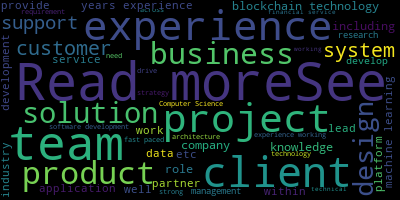

In [718]:
import wordcloud
from wordcloud import WordCloud

# word cloud for job description for all jobs
wc=WordCloud(max_words=50, stopwords=None, background_color='black').generate(' '.join(df['job_desc']))
wc.to_image()

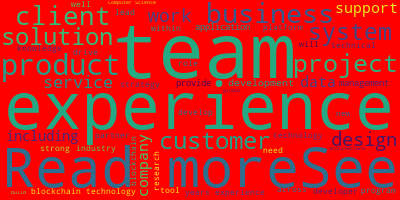

In [719]:
# word cloud for job description in USA jobs
df_cloud=df.loc[df['country_name']=='United States',['job_desc']]
wc=WordCloud(max_words=50, stopwords=None, background_color='red').generate(' '.join(df_cloud['job_desc']))
wc.to_image()

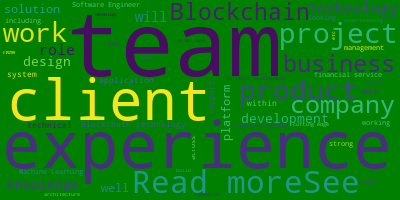

In [720]:
# word cloud for job description in UK jobs
df_cloud=df.loc[df['country_name']=='United Kingdom',['job_desc']]
wc=WordCloud(max_words=50, stopwords=None, background_color='green').generate(' '.join(df_cloud['job_desc']))
wc.to_image()

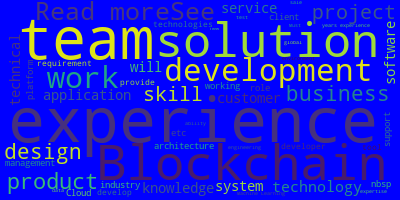

In [721]:
# word cloud for job description in India jobs
df_cloud=df.loc[df['country_name']=='India',['job_desc']]
wc=WordCloud(max_words=50, stopwords=None, background_color='blue').generate(' '.join(df_cloud['job_desc']))
wc.to_image()

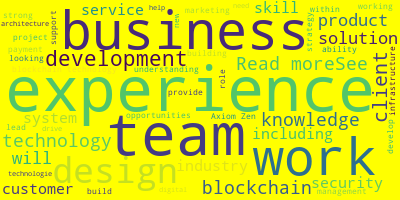

In [722]:
# word cloud for job description in India jobs
df_cloud=df.loc[df['country_name']=='Canada',['job_desc']]
wc=WordCloud(max_words=50, stopwords=None, background_color='yellow').generate(' '.join(df_cloud['job_desc']))
wc.to_image()

In [723]:
# number of characters in job descriptions

df['char_count'] = df['job_desc'].str.len() ## this also includes spaces
df[['job_desc','char_count']].head()

job_desc  char_count
0  Position Description Technica Corporation is s...        4343
1  Boston, USACircle is a global internet finance...        2357
2  About ConsenSys ConsenSys is a venture product...        3095
3  About Us:Mercury Protocol is the future of com...        2259
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...        2371

In [724]:
# average word length
# the average word length of each job description. This can also potentially help us in improving our model.
# Here, we simply take the sum of the length of all the words and divide it by the total length of the job descriptions

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['job_desc'].apply(lambda x: avg_word(x))
df[['job_desc','avg_word']].head()

job_desc  avg_word
0  Position Description Technica Corporation is s...  6.830325
1  Boston, USACircle is a global internet finance...  6.211009
2  About ConsenSys ConsenSys is a venture product...  6.583333
3  About Us:Mercury Protocol is the future of com...  6.220447
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...  6.503165

In [725]:
# number of stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['job_desc'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['job_desc','stopwords']].head()
#df['job_desc'].head(1)[0]

job_desc  stopwords
0  Position Description Technica Corporation is s...        160
1  Boston, USACircle is a global internet finance...         96
2  About ConsenSys ConsenSys is a venture product...        148
3  About Us:Mercury Protocol is the future of com...         94
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...         99

In [726]:
# number of numerical values in description
df['numerics'] = df['job_desc'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['job_desc','numerics']].head()


job_desc  numerics
0  Position Description Technica Corporation is s...         4
1  Boston, USACircle is a global internet finance...         1
2  About ConsenSys ConsenSys is a venture product...         1
3  About Us:Mercury Protocol is the future of com...         2
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...         0

In [727]:
# number of special characters
df['hastags'] = df['job_desc'].apply(lambda x: len([x for x in x.split() if x.startswith('-')]))
df[['job_desc','hastags']].head()

job_desc  hastags
0  Position Description Technica Corporation is s...        0
1  Boston, USACircle is a global internet finance...        0
2  About ConsenSys ConsenSys is a venture product...        0
3  About Us:Mercury Protocol is the future of com...        0
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...        0

In [728]:
# number of upper case

df['upper'] = df['job_desc'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['job_desc','upper']].head()

job_desc  upper
0  Position Description Technica Corporation is s...     12
1  Boston, USACircle is a global internet finance...      2
2  About ConsenSys ConsenSys is a venture product...      5
3  About Us:Mercury Protocol is the future of com...      4
4  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...     14

In [729]:
df.head()

average_salary   city_state  company_id      company_name company_rating  \
0        $74,000       Dulles       13747          Technica            2.9   
1            NaN       Boston     1291298            Circle            4.4   
2        $72,000     Brooklyn     1613426         ConsenSys            4.6   
3            NaN  Los Angeles     2078523  Mercury Protocol           None   
4            NaN     Pasadena     1333434              ObEN            5.0   

    country_name                                           job_desc  \
0  United States  Position Description Technica Corporation is s...   
1  United States  Boston, USACircle is a global internet finance...   
2  United States  About ConsenSys ConsenSys is a venture product...   
3  United States  About Us:Mercury Protocol is the future of com...   
4  United States  SOFTWARE ENGINEERING BLOCKCHAIN ENGINEERObEN’s...   

              job_title     post_date  \
0  BlockChain Developer    3 days ago   
1   Blockchain Engineer   17 days ago   
2   Blockchain Engineer    4 days ago   
3   Senior iOS Engineer   11 days ago   
4   Blockchain Engineer   27 days ago   

                                         Competitors  ...    \
0  CACI International, Knowledge Consulting Group...  ...     
1                                            Unknown  ...     
2                                            Unknown  ...     
3                                                NaN  ...     
4                                            Unknown  ...     

                               Revenue                  Size  \
0  $100 to $500 million (USD) per year  201 to 500 employees   
1             Unknown / Non-Applicable   51 to 200 employees   
2    $25 to $50 million (USD) per year  201 to 500 employees   
3             Unknown / Non-Applicable     1 to 50 employees   
4             Unknown / Non-Applicable     1 to 50 employees   

                Type word_count char_count  avg_word stopwords  numerics  \
0  Company - Private        559       4343  6.830325       160         4   
1  Company - Private        327       2357  6.211009        96         1   
2  Company - Private        410       3095  6.583333       148         1   
3  Company - Private        313       2259  6.220447        94         2   
4  Company - Private        317       2371  6.503165        99         0   

   hastags  upper  
0        0     12  
1        0      2  
2        0      5  
3        0      4  
4        0     14  

[5 rows x 24 columns]

In [733]:
df_word_plot = df[['word_count','char_count','avg_word']]
#df_word_plot.iplot()
df_word_plot.iplot(kind='histogram', filename='cufflinks/basic-histogram',theme='solar')



# text data clean up

In [753]:
# lower case to avoid duplicates
df['job_desc1'] = df['job_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['job_desc1'].head(1)[0]

'position description technica corporation is seeking an experienced blockchain developer who has solid expertise in system and software architecture, delivering scalable enterprise software. the perfect individual will be confident and experienced with relevant full life-cycle architecture and software development capabilities. job duties and responsibilities:must have broad and deep technical knowledge and passion for learning new technologies rapidly and independentlyshould have broad technical foundation and be able to understand network, operating system, database and application development designknowledge, skills and abilities:bachelor\'s degree in relevant area of study3-5 years of computer science/programming experience3-6 months of experience with blockchainexperience with distributed systems and protocol designexperience with rdbms, nosql or distributed databasesexpertise in cloud native, micro-services based system software developmentstrong programming experience in go, no

In [755]:
# removing punctuation

df['job_desc1']=df['job_desc1'].str.replace('[^\w\s]','')
#print(df1['job_desc'].head(1))


In [757]:
# removing spaces from the data set
import re
df['job_desc1'].apply(lambda x: re.sub(' +',' ',x))
#df['job_desc1'].head(1)[0]

0      position description technica corporation is s...
1      boston usacircle is a global internet finance ...
2      about consensys consensys is a venture product...
3      about usmercury protocol is the future of comm...
4      software engineering blockchain engineerobens ...
5      blockstack is a new internet for decentralized...
6      consulting manager technology risk complianceb...
7      pwclos overview pwc is a network of firms comm...
8       experience designing and building highlyscale...
9      blockchain engineer us wide come join one of t...
10     description our client is the top strategy and...
11     blockchain is the worlds leading software plat...
12     if you enjoy interacting with customers assist...
13     bachelors degree in computer science or relate...
14     about us mercury protocol is the future of com...
15     blockchain is the worlds leading software plat...
16     job descriptionsenior enterprise blockchain ar...
17     blockchain is the worlds

In [758]:
# removing stop words or commonly repeating words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['job_desc1'] = df['job_desc1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#df['job_desc1'].head()[0]

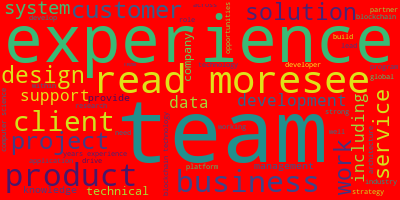

In [759]:
# word cloud for job description in USA jobs
df_cloud=df.loc[df['country_name']=='United States',['job_desc1']]
wc=WordCloud(max_words=50, stopwords=None, background_color='red').generate(' '.join(df_cloud['job_desc1']))
wc.to_image()

In [766]:
# most commonly used words in all descriptions
# combined the description of all rows and counts most frequesnt worlds
freq = pd.Series(' '.join(df['job_desc1']).split()).value_counts()[:1000]
freq

experience        5559
blockchain        5257
team              4386
business          4003
work              3914
technology        3680
development       3529
new               2715
working           2653
software          2493
skills            2330
product           2135
solutions         2120
read              2117
data              2077
moresee           2038
management        1951
services          1944
technologies      1912
design            1862
role              1832
technical         1795
company           1759
years             1692
knowledge         1622
digital           1591
teams             1486
including         1472
opportunity       1447
building          1446
                  ... 
revolution         112
reviews            112
engaging           112
beyond             112
leveraging         112
intelligent        111
improvements       111
meetings           111
fulltime           111
empower            111
tests              111
scala              111
billions   

In [767]:
# removing most frequesnt( top ten as above) words from each job description
freq = list(freq.index)
df['job_desc2'] = df['job_desc1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['job_desc2'].head()[0]


'technica corporation perfect confident responsibilitiesmust independentlyshould foundation designknowledge abilitiesbachelors study35 scienceprogramming experience36 blockchainexperience protocol designexperience rdbms databasesexpertise developmentstrong node cstrong structuresunderstanding cryptographic underpinning technologiesunderstanding practicesgood webscale infrastructuregood container solutionsexperience solutionsexperience rdbms node structures algorithmsabout technica technica corporation exceed expectations specialize dc metro technological advisor department defense federal statements intended describe nature performed intended construed exhaustive list personnel classifiedequal technicas affirmatively eeo creed genetic characteristic covers assignment promotion transfer conditions longevity retirement employee terminationtechnicas eeo philosophy promotes unlawful employee harassment mentioned characteristics prohibited minoritieswomenvetsdisablednew technica corporation

In [768]:
# removing less frequest worlds

#freq = pd.Series(' '.join(df['job_desc1']).split()).value_counts()[-10:]
#freq

#freq = list(freq.index)
#df['job_desc1'] = df['job_desc1'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#df['job_desc1'].head()[0]

In [775]:
df['job_desc1']

1    boston usacircle global internet finance compa...
1    research data scientist blockchain startupcamb...
1    mnp pride different entrepreneurial drive sets...
1    filière métierinformatique intitulé du postest...
1    job description masteribm 2018 blockchain cons...
1    finished exams sure career path want take look...
1    credit suisse leading global wealth manager st...
1    ernst young ey si definisce attraverso suoi va...
1    qualifications bachelors degreeminimum 4 years...
Name: job_desc1, dtype: object

In [776]:
# Tokenization - devided text in to list of worlds or sentences

from textblob import TextBlob
TextBlob('ersd frtgg fgtr gftr ghty that is ruf' ).words

WordList(['ersd', 'frtgg', 'fgtr', 'gftr', 'ghty', 'that', 'is', 'ruf'])

In [781]:
#Stemming

#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc.
#use PorterStemmer from the NLTK library.

#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#df['job_desc1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))



0      posit descript technica corpor seek experienc ...
1      boston usacircl global internet financ compani...
2      consensi consensi ventur product studio focus ...
3      usmercuri protocol futur commun power blockcha...
4      softwar engin blockchain engineeroben mission ...
5      blockstack new internet decentr app blockstack...
6      consult manag technolog risk complianceboston ...
7      pwclo overview pwc network firm commit deliv q...
8      experi design build highlysc distribut system ...
9      blockchain engin us wide come join one world l...
10     descript client top strategi technolog advisor...
11     blockchain world lead softwar platform digit a...
12     enjoy interact custom assist product develop w...
13     bachelor degre comput scienc relat fieldmba eq...
14     us mercuri protocol futur commun power blockch...
15     blockchain world lead softwar platform digit a...
16     job descriptionsenior enterpris blockchain arc...
17     blockchain world lead so

In [784]:
# Lemmatization

# Lemmatization is a more effective option than stemming
# it converts the word into its root word, rather than just stripping the suffices.

from textblob import Word
df['job_desc1'] = df['job_desc1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['job_desc1'].head()[1]

'boston usacircle global internet finance company built blockchain technology powered crypto asset dedicated helping people everywhere create share valueweve already made sending money around world free easy using blockchain technology circle pay circle invest expanding offering cryptocurrency investment product enabling anyone buy sell crypto asset circle trade market maker top crypto coin offer otc trading service march 2018 circle acquired poloniex one world leading token marketplacescircles engineering team enables u scale supporting customer world processing million transaction across multiple currency reliable secure fast waywhat youll work working team expert developer develop worldclass crypto asset platformdesigning implementing different blockchain technology circle internal platformestablishing maintaining environment blockchain solution implemented including development testing production environmentsmaintain continuous integration pipeline development testing application y

In [787]:
# N-grams
# N-grams are the combination of multiple words used together.
# Ngrams with N=1 are called unigrams, bigrams (N=2), trigrams (N=3)

#The basic principle behind n-grams is that they capture the language structure,
#like what letter or word is likely to follow the given one. 
#The longer the n-gram (the higher the n), the more context you have to work with.

TextBlob(df['job_desc1'].head()[1]).ngrams(3)


[WordList(['boston', 'usacircle', 'global']),
 WordList(['usacircle', 'global', 'internet']),
 WordList(['global', 'internet', 'finance']),
 WordList(['internet', 'finance', 'company']),
 WordList(['finance', 'company', 'built']),
 WordList(['company', 'built', 'blockchain']),
 WordList(['built', 'blockchain', 'technology']),
 WordList(['blockchain', 'technology', 'powered']),
 WordList(['technology', 'powered', 'crypto']),
 WordList(['powered', 'crypto', 'asset']),
 WordList(['crypto', 'asset', 'dedicated']),
 WordList(['asset', 'dedicated', 'helping']),
 WordList(['dedicated', 'helping', 'people']),
 WordList(['helping', 'people', 'everywhere']),
 WordList(['people', 'everywhere', 'create']),
 WordList(['everywhere', 'create', 'share']),
 WordList(['create', 'share', 'valueweve']),
 WordList(['share', 'valueweve', 'already']),
 WordList(['valueweve', 'already', 'made']),
 WordList(['already', 'made', 'sending']),
 WordList(['made', 'sending', 'money']),
 WordList(['sending', 'money',

In [796]:
# Term frequescy

# Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.
# TF = (Number of times term T appears in the particular row) / (number of terms in that row)

tf1 = (df['job_desc1'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


words  tf
0                  circle   8
1              blockchain   6
2                  crypto   4
3                  status   3
4                   asset   3
5                   world   3
6             development   3
7                    team   3
8              technology   3
9                     pay   2
10                    one   2
11                  youll   2
12               internet   2
13                working   2
14                  money   2
15                testing   2
16                      u   2
17                million   2
18              including   2
19                 boston   2
20               internal   2
21                 invest   2
22             worldclass   1
23                    san   1
24             investment   1
25                 around   1
26                  sachs   1
27              francisco   1
28                 breyer   1
29               multiple   1
..                    ...  ..
155              identify   1
156             diversity   1
157  environmentsmaintain   1
158                  2018   1
159               marital   1
160                  sean   1
161               capital   1
162                 token   1
163                    go   1
164             different   1
165                market   1
166                 using   1
167              national   1
168             valueweve   1
169              enabling   1
170               general   1
171              catalyst   1
172                global   1
173               veteran   1
174  platformestablishing   1
175                 built   1
176              poloniex   1
177             impacting   1
178                across   1
179                 value   1
180                backed   1
181                  free   1
182                 scale   1
183              reliable   1
184               develop   1

[185 rows x 2 columns]

In [794]:
df['words']

KeyError: 'words'

In [799]:
# Inverse document frequesncy

# inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.
#Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.
#IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['job_desc1'].str.contains('words')])))
tf1


words  tf       idf
0                  circle   8  4.185737
1              blockchain   6  4.185737
2                  crypto   4  4.185737
3                  status   3  4.185737
4                   asset   3  4.185737
5                   world   3  4.185737
6             development   3  4.185737
7                    team   3  4.185737
8              technology   3  4.185737
9                     pay   2  4.185737
10                    one   2  4.185737
11                  youll   2  4.185737
12               internet   2  4.185737
13                working   2  4.185737
14                  money   2  4.185737
15                testing   2  4.185737
16                      u   2  4.185737
17                million   2  4.185737
18              including   2  4.185737
19                 boston   2  4.185737
20               internal   2  4.185737
21                 invest   2  4.185737
22             worldclass   1  4.185737
23                    san   1  4.185737
24             investment   1  4.185737
25                 around   1  4.185737
26                  sachs   1  4.185737
27              francisco   1  4.185737
28                 breyer   1  4.185737
29               multiple   1  4.185737
..                    ...  ..       ...
155              identify   1  4.185737
156             diversity   1  4.185737
157  environmentsmaintain   1  4.185737
158                  2018   1  4.185737
159               marital   1  4.185737
160                  sean   1  4.185737
161               capital   1  4.185737
162                 token   1  4.185737
163                    go   1  4.185737
164             different   1  4.185737
165                market   1  4.185737
166                 using   1  4.185737
167              national   1  4.185737
168             valueweve   1  4.185737
169              enabling   1  4.185737
170               general   1  4.185737
171              catalyst   1  4.185737
172                global   1  4.185737
173               veteran   1  4.185737
174  platformestablishing   1  4.185737
175                 built   1  4.185737
176              poloniex   1  4.185737
177             impacting   1  4.185737
178                across   1  4.185737
179                 value   1  4.185737
180                backed   1  4.185737
181                  free   1  4.185737
182                 scale   1  4.185737
183              reliable   1  4.185737
184               develop   1  4.185737

[185 rows x 3 columns]

In [801]:
# TD-IDF
# TF-IDF is the multiplication of the TF and IDF which we calculated above.
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

words  tf       idf      tfidf
0                  circle   8  4.185737  33.485896
1              blockchain   6  4.185737  25.114422
2                  crypto   4  4.185737  16.742948
3                  status   3  4.185737  12.557211
4                   asset   3  4.185737  12.557211
5                   world   3  4.185737  12.557211
6             development   3  4.185737  12.557211
7                    team   3  4.185737  12.557211
8              technology   3  4.185737  12.557211
9                     pay   2  4.185737   8.371474
10                    one   2  4.185737   8.371474
11                  youll   2  4.185737   8.371474
12               internet   2  4.185737   8.371474
13                working   2  4.185737   8.371474
14                  money   2  4.185737   8.371474
15                testing   2  4.185737   8.371474
16                      u   2  4.185737   8.371474
17                million   2  4.185737   8.371474
18              including   2  4.185737   8.371474
19                 boston   2  4.185737   8.371474
20               internal   2  4.185737   8.371474
21                 invest   2  4.185737   8.371474
22             worldclass   1  4.185737   4.185737
23                    san   1  4.185737   4.185737
24             investment   1  4.185737   4.185737
25                 around   1  4.185737   4.185737
26                  sachs   1  4.185737   4.185737
27              francisco   1  4.185737   4.185737
28                 breyer   1  4.185737   4.185737
29               multiple   1  4.185737   4.185737
..                    ...  ..       ...        ...
155              identify   1  4.185737   4.185737
156             diversity   1  4.185737   4.185737
157  environmentsmaintain   1  4.185737   4.185737
158                  2018   1  4.185737   4.185737
159               marital   1  4.185737   4.185737
160                  sean   1  4.185737   4.185737
161               capital   1  4.185737   4.185737
162                 token   1  4.185737   4.185737
163                    go   1  4.185737   4.185737
164             different   1  4.185737   4.185737
165                market   1  4.185737   4.185737
166                 using   1  4.185737   4.185737
167              national   1  4.185737   4.185737
168             valueweve   1  4.185737   4.185737
169              enabling   1  4.185737   4.185737
170               general   1  4.185737   4.185737
171              catalyst   1  4.185737   4.185737
172                global   1  4.185737   4.185737
173               veteran   1  4.185737   4.185737
174  platformestablishing   1  4.185737   4.185737
175                 built   1  4.185737   4.185737
176              poloniex   1  4.185737   4.185737
177             impacting   1  4.185737   4.185737
178                across   1  4.185737   4.185737
179                 value   1  4.185737   4.185737
180                backed   1  4.185737   4.185737
181                  free   1  4.185737   4.185737
182                 scale   1  4.185737   4.185737
183              reliable   1  4.185737   4.185737
184               develop   1  4.185737   4.185737

[185 rows x 4 columns]

In [802]:
# TF-IDF with sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df['job_desc1'])

train_vect


<2038x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 238662 stored elements in Compressed Sparse Row format>

In [338]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df1['job_desc'])
train_bow

<853x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 82255 stored elements in Compressed Sparse Row format>

In [489]:
# sentiment analysis

#we only extract polarity as it indicates the sentiment as value 
#nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 

df1['job_desc'][:5].apply(lambda x: TextBlob(x).sentiment)
df1['sentiment'] = df1['job_desc'].apply(lambda x: TextBlob(x).sentiment[0] )
df1[['job_desc','sentiment']].head(30)

# which country has more positive sentiment in job description ?

NameError: name 'df1' is not defined